In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [35]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0
        
        elif wine_type == "white":
            number = 2
        
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data


red_wine = labelWine(6, "red", red_wine)  #labeling the wine as being good or bad for both white and red whites
white_wine = labelWine(6, "white",white_wine)     

wine = pd.concat([red_wine,white_wine], ignore_index=True) #combining the red and white wine dataset after labeling 


    
wine = wine.drop(['quality'], axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,3


# Clustering the dataset into 4 clusters
- The goal is to have the data group itself into good white wine, good red white wine, bad white wine and bad red wine
- good and bad wine will be determined by its quality rating

## Agglomerative Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, RobustScaler

# split the labels and features
labels = wine['label']
features = wine.drop(['label'], axis = 1)
print(features.shape)
names = ['ward euclidean', 'complete euclidean', 'average euclidean', 'single euclidean',
        'complete l1', 'average l1', 'single l1', 'complete l2', 'average l2', 'single l2']

def scale_fit(scaler, features, labels):
    
    sc_features = features.copy()
    scaler.fit(sc_features)
    # need to transform the features
    sc_features = scaler.transform(sc_features)
    scores = aggclust_initial(sc_features, labels, 4)
    return scores

def aggclust_initial(features, labels, n_clust):
    scores = {name: [] for name in ('ward', 'complete', 'average', 'single', 'ward euclidean',
                                    'complete euclidean', 'average euclidean', 'single euclidean',
                                    'complete l1', 'average l1', 'single l1',
                                    'complete l2', 'average l2', 'single l2')}
    for linkage_mode in ('ward', 'complete', 'average', 'single'):
        for affinity in ('euclidean', 'l1', 'l2'):
            if linkage_mode == 'ward' and affinity != 'euclidean':
                print('skip l1 and l2 for ward')
            else:
                clust = AgglomerativeClustering(n_clusters = n_clust, affinity = affinity, 
                                                linkage = linkage_mode).fit(features)
                ARI_score = metrics.adjusted_rand_score(labels, clust.labels_)
                scores[linkage_mode + ' ' + affinity].append(ARI_score)
                scores[linkage_mode].append(ARI_score)
                print(f'AHC Affinity={affinity:9} Linkage mode={linkage_mode:8} ARI score = {ARI_score:.5}')
            
    return scores


# intitial results no scaling                
scores = aggclust_initial(features, labels, 4)

# scale the data
sc_features = scale(features, axis = 1)
print("\n \tNow Scaled")
# results with scaling
sc_scores = aggclust_initial(sc_features, labels, 4)


(6497, 11)
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.16255
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.24452
AHC Affinity=l1        Linkage mode=complete ARI score = -0.013737
AHC Affinity=l2        Linkage mode=complete ARI score = 0.24452
AHC Affinity=euclidean Linkage mode=average  ARI score = 0.30738
AHC Affinity=l1        Linkage mode=average  ARI score = 0.00052832
AHC Affinity=l2        Linkage mode=average  ARI score = 0.30738
AHC Affinity=euclidean Linkage mode=single   ARI score = 0.0001167
AHC Affinity=l1        Linkage mode=single   ARI score = 0.0001167
AHC Affinity=l2        Linkage mode=single   ARI score = 0.0001167

 	Now Scaled
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.17357
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.11276
AHC Affinity=l1        Linkage mode=complete ARI score = 0.22895
AHC Affinity=l2        

In [63]:
# scale with different methods.
mm_scaler = MinMaxScaler()
n_scaler = Normalizer()
r_scaler = RobustScaler()


# transform the data and fit a model with that data
print("\n \tNow Scaled Min Max")
mm_scores = scale_fit(mm_scaler, features, labels)
print("\n \tNow Scaled Normalizer")
n_scores = scale_fit(n_scaler, features, labels)
print("\n \tNow Scaled RobustScaler")
r_scores = scale_fit(r_scaler, features, labels)


 	Now Scaled Min Max
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.25854
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.0027301
AHC Affinity=l1        Linkage mode=complete ARI score = 0.38971
AHC Affinity=l2        Linkage mode=complete ARI score = 0.0027301
AHC Affinity=euclidean Linkage mode=average  ARI score = -0.00020567
AHC Affinity=l1        Linkage mode=average  ARI score = 0.00015839
AHC Affinity=l2        Linkage mode=average  ARI score = -0.00020567
AHC Affinity=euclidean Linkage mode=single   ARI score = 0.00015839
AHC Affinity=l1        Linkage mode=single   ARI score = 0.00015839
AHC Affinity=l2        Linkage mode=single   ARI score = 0.00015839

 	Now Scaled Normalizer
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.23108
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.17333
AHC Affinity=l1        Linkage mode=complete ARI scor

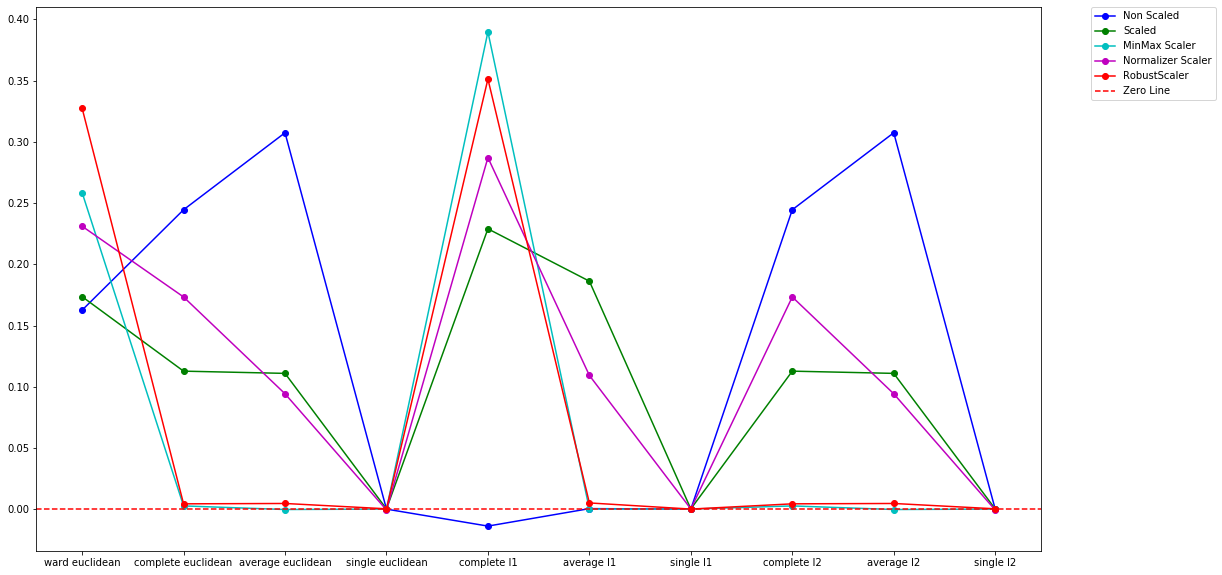

In [69]:
# setup data to display results

def setup_chart_data(score_lst, names):
    values = []
    for name in names:
        values.append(score_lst[name][0])
    return values
        
values = setup_chart_data(scores, names)
sc_values = setup_chart_data(sc_scores, names)
mm_values = setup_chart_data(mm_scores, names)
n_values = setup_chart_data(n_scores, names)
r_values = setup_chart_data(r_scores, names)

    
# plot the data  
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.plot(names, values, 'b', marker='o', label = 'Non Scaled')
plt.plot(names, sc_values, 'g', marker='o', label = 'Scaled')
plt.plot(names, mm_values, 'c', marker='o', label = 'MinMax Scaler')
plt.plot(names, n_values, 'm', marker='o', label = 'Normalizer Scaler')
plt.plot(names, r_values, 'r', marker='o', label = 'RobustScaler')


plt.axhline(0, c='r', linestyle='--', label= 'Zero Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### Results
- When we visualize the results we see that he scaled data does not always perform better than the raw data. We also see that the scaled data typically works better when we linkage = 'complete' and affinity = 'l1'. 
- Overall the non scaled data worked best with linkage = 'average' and affinity = 'euclidean'. 
- The best performing model used complete l1 with the data scaled with the min max scaler.

In [21]:
for k,v in scores.items():
    print(k, v)

ward [0.16255084342472914]
complete [0.24452349182144464, -0.013737148766553683, 0.24452349182144464]
average [0.30737634461812696, 0.0005283195865163993, 0.30737634461812696]
single [0.00011669883762438619, 0.00011669883762438619, 0.00011669883762438619]
ward euclidean [0.16255084342472914]
complete euclidean [0.24452349182144464]
average euclidean [0.30737634461812696]
single euclidean [0.00011669883762438619]
complete l1 [-0.013737148766553683]
average l1 [0.0005283195865163993]
single l1 [0.00011669883762438619]
complete l2 [0.24452349182144464]
average l2 [0.30737634461812696]
single l2 [0.00011669883762438619]


### Create a Dendogram
- This will help us see the clusters that exist within our models based on the type of data that we use 

In [74]:
from scipy.cluster.hierarchy import dendrogram
# code taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def setup_dendogram(features, model):
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    

    
# setting distance_threshold=0 ensures we compute the full tree.
# create a model to view dendogram with the raw data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'euclidean')

# create a model to view dendogram with the scaled data
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'complete', affinity = 'l1')

# create dendograms to compare the models cluster distances
setup_dendogram(features, model)
setup_dendogram(features, model2)


ValueError: Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.

### Raw Data
- The raw data seems to have a large 4 group area with it's optimized model than with the scaled data's optimized model. 
- The data also seems to fit better into 3 distinct groups. This may be because we have a larger number of white wines than red wines in our data set. 

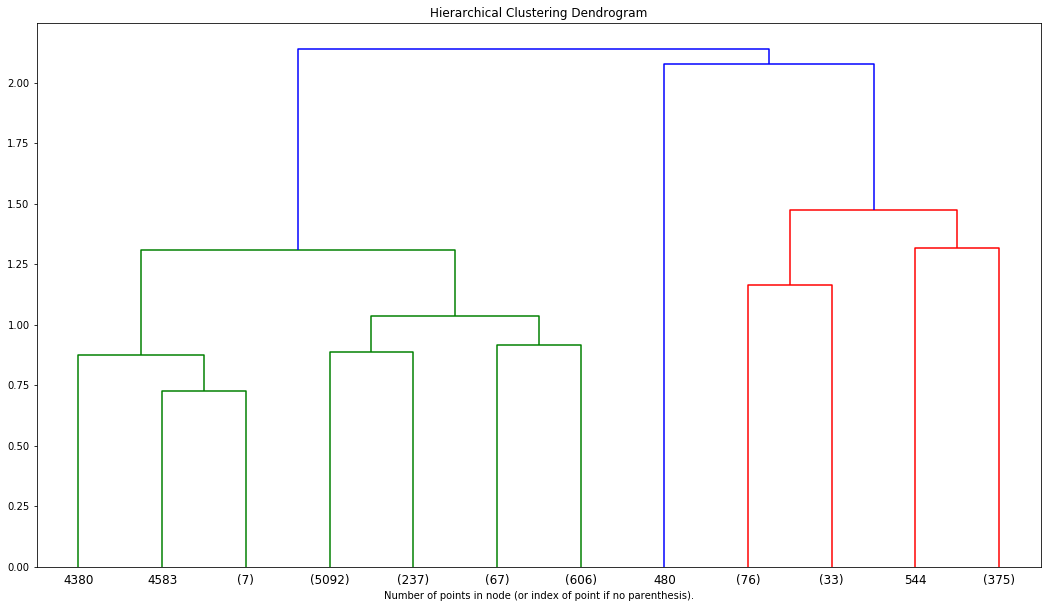

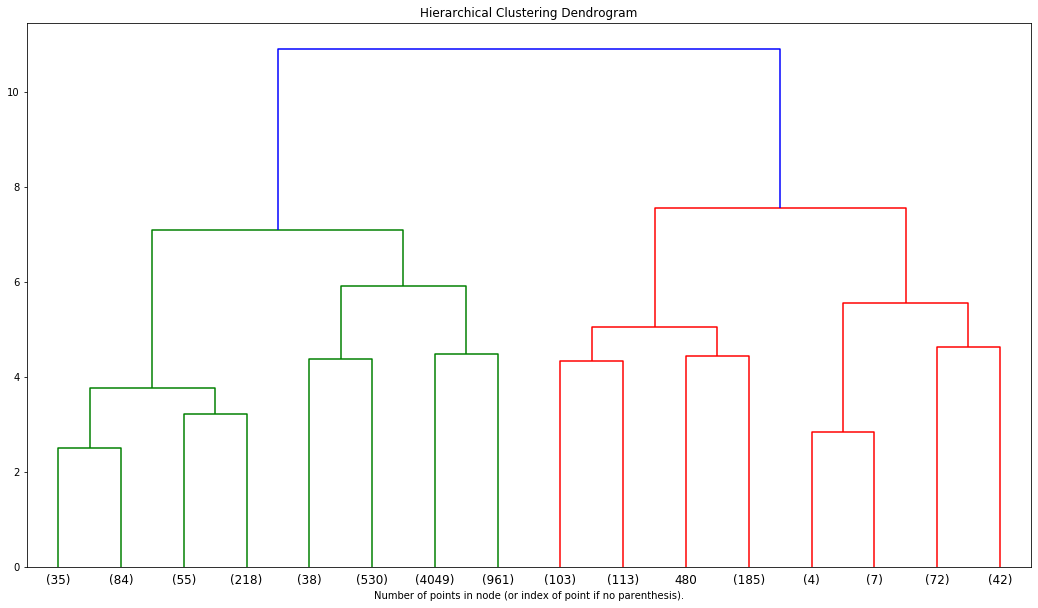

In [71]:
setup_dendogram(sc_features, model)
setup_dendogram(sc_features, model2)

### Scaled Data
- Again we see that the ideal model works better to create 4 distinct groups
- We also see that it there is a small disntance between the 4 distinct groups

# Now we will compare the other scalers

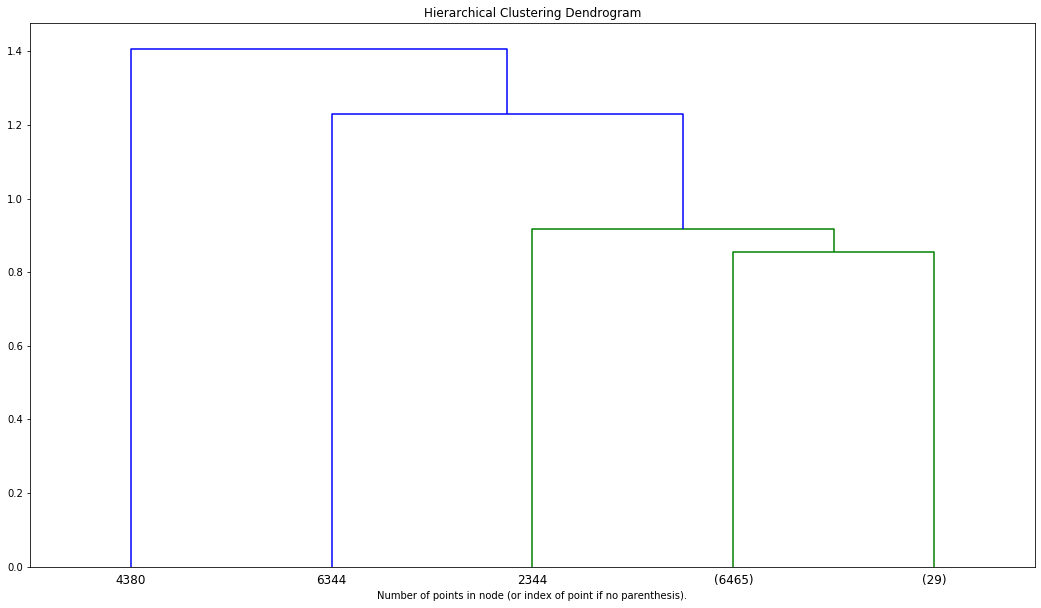

In [73]:
def setup_dendogram_scaled(scaler, features, model):
    
    scaler.fit(features)
    features = scaler.transform(features)
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
setup_dendogram_scaled(mm_scaler, features, model)

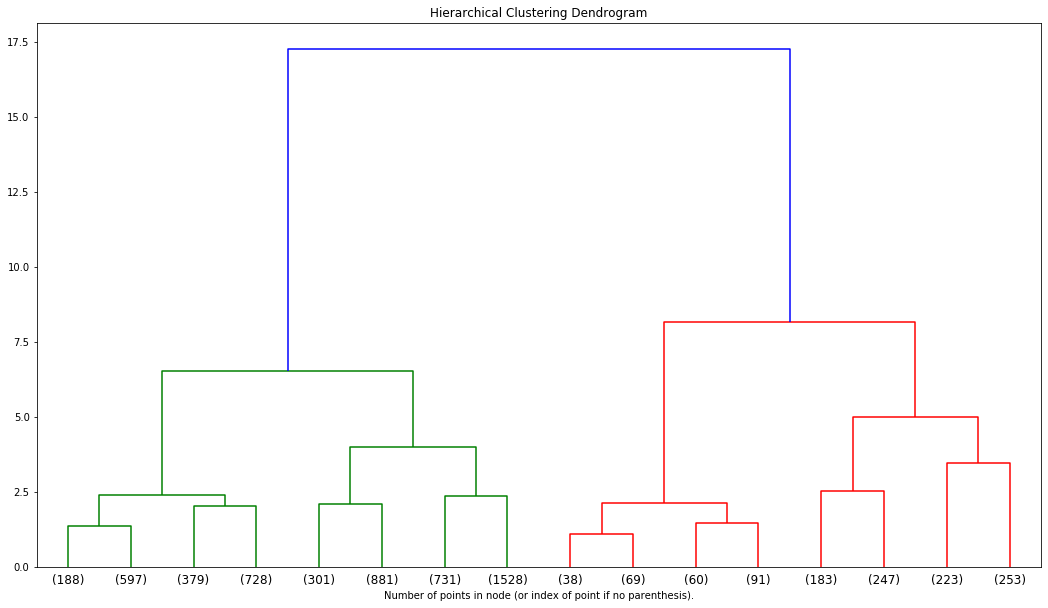

In [43]:
setup_dendogram_scaled(n_scaler, features, model)

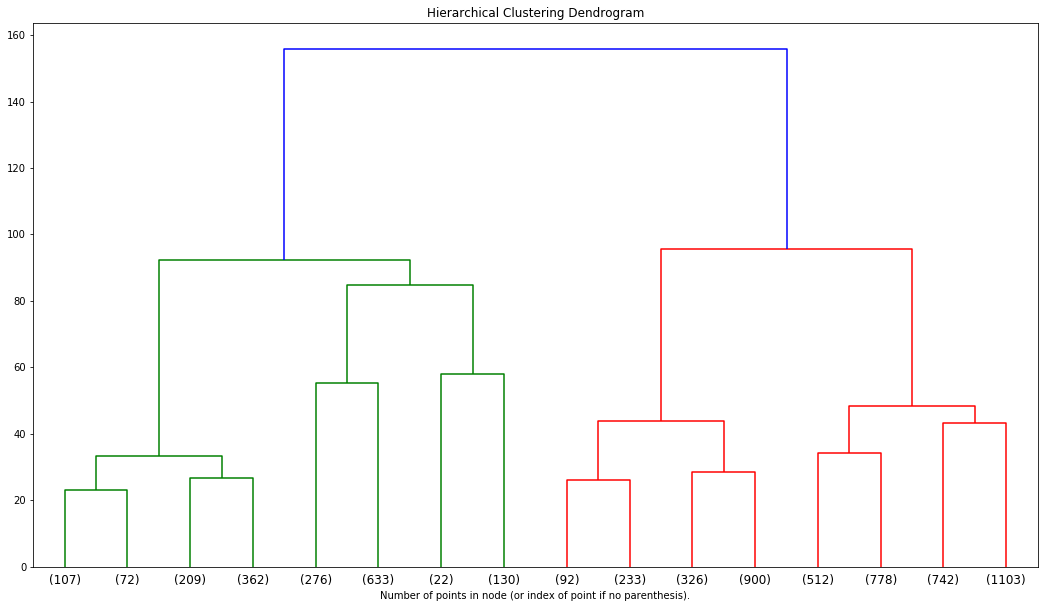

In [44]:
setup_dendogram_scaled(r_scaler, features, model)

### Results
- These dendograms show us the arrangement of the clusters. We can see that the greatest difference would occur if we tried to group the wines into two clusters. This makes sense as we did initially have two separate groups of wine, red and white. Our goal was to see if the wines can be separated into 4 clusters. Good Red, Bad Red, Good White and Bad White. The dendogram shows us that our features do not provide us with 4 well defined groups. A group of three or two would provide us with clusters with greater distance between the groups. 
- The minmax scaler clearly works the best to segment the data into clusters. It shows us that the wines can clearly be broken into 5 clusters with this scaler. 
- We could use this information to try to group our wines differently and see if that made a difference. This would require us to go back through the data and assign different labels
- Overall we found that Agglomerative testing did not work well to separate the wines into 4 groups.